In [1]:
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

Code is adopted from: https://www.chromatocosmos.com/post/a-brief-intro-to-generative-art-in-python-and-the-axidraw-plotter
We try to stuff as many non-overlapping circles as we can randomly into a box and then generate a SVG

In [2]:
# box size
x_bounds = [-5, 5]
y_bounds = [-5, 5]

# size of the circle
min_radius = 0.1
max_radius = 2

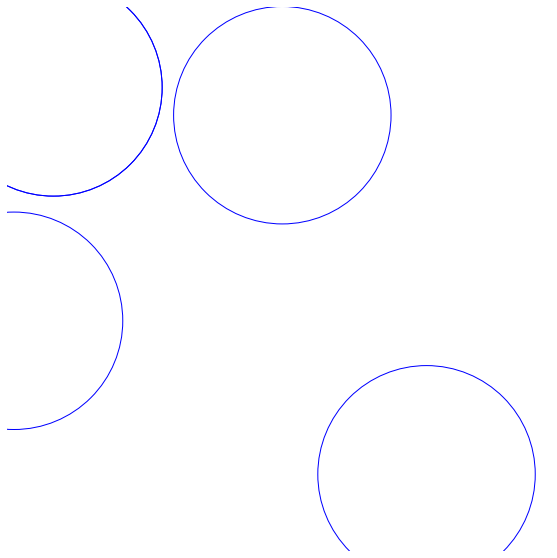

In [3]:
n_tries = 5
circles = []

for i in range(n_tries):
    cx, cy = np.random.uniform(*x_bounds), np.random.uniform(*y_bounds)
    c = np.array([cx, cy])
    
    r = max_radius
    
    for ci, ri in circles:
        
        dist = np.linalg.norm(c-ci)
        largest_r = dist-ri
        largest_r = np.clip(largest_r, 0, largest_r)
        r = min(r, largest_r)
        
    if r >= min_radius:
        circles.append((c, r))

blue_patches = []
blue_patches.append(mpatches.Circle(c, r, fill=None, edgecolor='blue'))

fig, ax = plt.subplots(figsize=(10, 10))

plt.grid(False)
plt.axis('off')
ax.set_aspect('equal')

ax.set_xlim(x_bounds)
ax.set_ylim(y_bounds)

for c, r in circles:
        blue_patches.append(mpatches.Circle(c, r, fill=None, edgecolor='blue'))

collection = PatchCollection(blue_patches, match_original=True)
ax.add_collection(collection)

plt.savefig('five-circles.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [19]:
n_tries = 5000
circles = []

for i in range(n_tries):
    cx, cy = np.random.uniform(*x_bounds), np.random.uniform(*y_bounds)
    c = np.array([cx, cy])
    
    r = max_radius
    
    for ci, ri in circles:
        
        dist = np.linalg.norm(c-ci)
        largest_r = dist-ri
        largest_r = np.clip(largest_r, 0, largest_r)
        r = min(r, largest_r)
        
    if r >= min_radius:
        circles.append((c, r))

In [20]:
blue_patches = []
red_patches = []

for c, r in circles:
    
    if np.random.random() > 0.5:
        blue_patches.append(mpatches.Circle(c, r, fill=None, edgecolor='blue'))
    else:
        red_patches.append(mpatches.Circle(c, r, fill=None, edgecolor='red'))

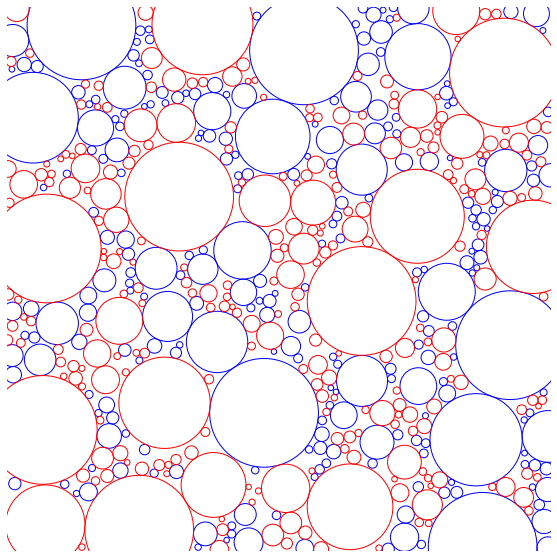

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.grid(False)
plt.axis('off')
ax.set_aspect('equal')

ax.set_xlim(x_bounds)
ax.set_ylim(y_bounds)

collection = PatchCollection(blue_patches+red_patches, match_original=True)
ax.add_collection(collection)

plt.show()

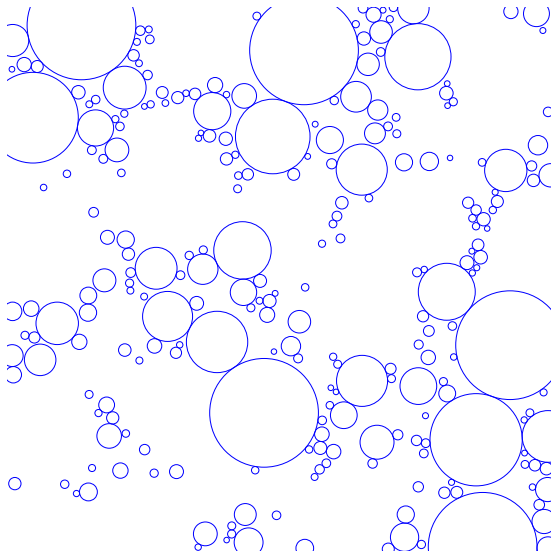

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.grid(False)
plt.axis('off')
ax.set_aspect('equal')

ax.set_xlim(x_bounds)
ax.set_ylim(y_bounds)

collection = PatchCollection(blue_patches, match_original=True)
ax.add_collection(collection)

plt.savefig('blue_layer.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()

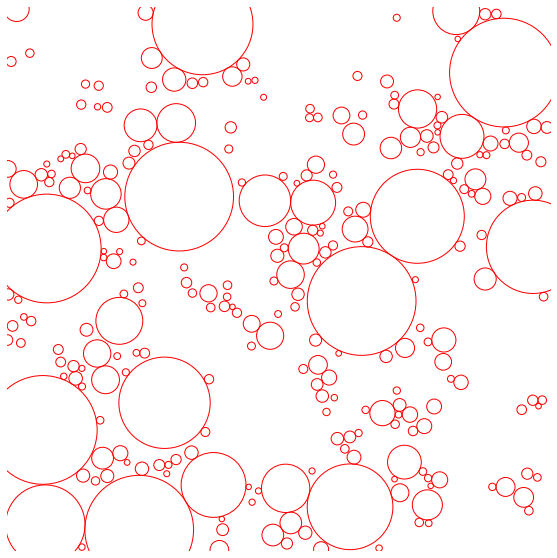

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.grid(False)
plt.axis('off')
ax.set_aspect('equal')

ax.set_xlim(x_bounds)
ax.set_ylim(y_bounds)

collection = PatchCollection(red_patches, match_original=True)
ax.add_collection(collection)

plt.savefig('red_layer.svg', bbox_inches = 'tight', pad_inches = 0)
plt.show()